<a href="https://colab.research.google.com/github/nikhil00shinde/ml/blob/main/Statistics_(1_Summary_Statistics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Statistics

### What is statistics?
- **The field of statistics** - the practice and study of collecting and analyzing data
- **A summary statistic** - a fact about or summary of some data

### What can statistics do?
- How likely is someone to purchase a product? Are people more likely to purchase it if they can use a different payment system?
- How many occupants will your hotel have? How can you optimize occupancy?
- How many sizes of jeans need to be manufactured so they can fit 95% of the population? Should the same number of each size be produced?
- A/B tests: Which ad is more effective in getting people to purchase a product?

## Types of statistics

### Descriptive statistics
- *Describe* and summarize data
- 50% of friends drive to work
- 25% take the bus
- 25% bike

### Inferential statistics
- Use a sample of data to make *inferences* about a larger population
- What percent of people drive to work?


## Types of Data

### Numeric(Quantitative)
- #### Continous (Measured)
   - Airplane speed
   - Time spent waiting in line

- #### Discrete (Counted)
   - Number of pets
   - Number of packages shipped


### Categorical (Qualitative)
- #### Nominal (Unorderd)
  - Married/unmarried
  - Country of residence

- #### Ordinal (Ordered)
  - Strongly disagree
  - Somewhat disagree
  - Neither agree nor disagree
  - Somewhat agree
  - Strongly agree


## Why does data type matter?

## Measures of Center


- Whats a typical value?
- Where is the center of the data?
  - Mean --> (average)
  - Median --> 50% of data is lower and 50% of data is higher (middle one)
  - Mode --> Most frequent value (*.value_count()*) For categotrical variable


Mean is sensitive to the extreme values
 - better work for symmetrical
 - not for skewed data (Data on right, tail on left) --> Left skewed data

Median (Better) because of outlier


In [ ]:
msleep['sleep_total'].agg([np.mean, np.median])

# adding an outlier


# Measures of spread

- it describes how spread apart or close together the data point are


### Variance
- Average distance from each data point to the data's mean

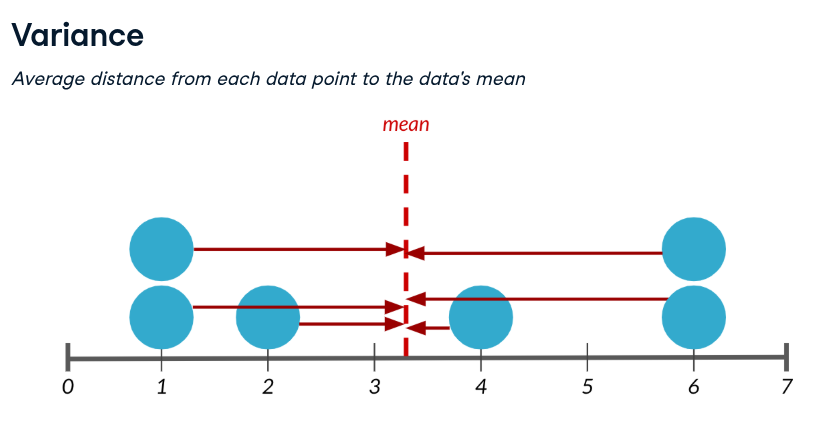

In [1]:
# Calculating variance

## 1. Subtract mean from each data point

dists = msleep['sleep_total'] - np.mean(msleep['sleep_total'])
print(dists)

## 2. Sqaure each distance

sq_dists = dists ** 2
print(sq_dists)

## 3. Sum all the squared distances

sum_sq_dists = np.sum(sq_dists)
print(sum_sq_dists)

## 4. Divide by number of data points -1
variance = sum_sq_dists / (len(msleep['sleep_total']) - 1)
print(variance)


## SIMPLE
np.var(msleep['sleep_total'], ddof=1)
# Without ddof=1, population variance is calculated instead of sample variance

# Standard of Deviation

- Square root of variance

In [ ]:
np.sqrt(np.var(msleep['sleep_total'], ddof=1))

np.std(msleep['sleep_total'], ddof=1)

# Mean absolute deviation

- Take the absolute value of distances to the mean, and then take the mean of the distances


**Standard deviation vs. mean absolute deviaton**
- Standard deviaton squares distances, penalizing longer distances more than shorter ones.
- Mean absolute deviation penalizws each distance equally.
- One isn't better than the other, but SD is more common than MAD.

In [ ]:
dists = msleep['sleep_total'] - np.mean(msleep['sleep_total'])
np.mean(np.abs(dists))




# Quantiles
- Split up the data in some equal part

- 0.5 quantile = median

Quantile

A general term for cutting data into equal parts.

Example:

Median = 0.5 quantile (cuts data in half).

Quartiles (divide into 4 parts), deciles (10 parts), percentiles (100 parts) → all are types of quantiles.

So quantile = "any cut point".
---
🔹 Quartile

A specific type of quantile where the data is divided into 4 equal parts.

Example:

Q1 (25%) = first quartile → 25% of values are below it.

Q2 (50%) = median → 50% below.

Q3 (75%) = third quartile → 75% below.

So quartile = quantile that divides into 4 parts.

Quantile = umbrella term (any division).

Quartile = special case (division into 4).

In [ ]:
np.quantile(msleep['sleep_total'], 0.5)



## QUARTILE
np.quantile(msleep['sleep_total'], [0.25, 0.5, 0.75])

## Box plots use quartiles


In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(msleep['sleep_total'])
plt.show()

## Quantiles using np.linspace()

np.linespace(start, stop, num)

In [ ]:
np.quantile(msleep['sleep_total'], np.linspace(0, 0.2, 0.4, 0.6, 0.8, 1))


np.quantile(msleep['sleep_total'], np.linspace(0, 1, 5))

## Interquartile Range (IQR)

- The Interquartile Range (IQR) measures how spread out the middle 50% of your data is.

- Height of the box plot

Formula:

IQR=Q3−Q1


where

Q1 = 25th percentile (first quartile)

Q3 = 75th percentile (third quartile)

In [ ]:
np.quantile(msleep['sleep_total'],0.75) - np.quantile(msleep['sleep_total'],0.25)


In [ ]:
from scipy import stats
stats.iqr(msleep['sleep_total'])

# Outlier

Outlier: data point that is substantially different from the others

How do we know what a substantial differnce is? A data point is an outlier if:
 - data < Q1 - 1.5 x iqr
 - data > Q3 + 1.5 x iqr


In [ ]:
from scipy.stats import iqr
iqr = iqr(msleep['sleep_total'])
lower_threshold = np.quantile(msleep['sleep_total'], 0.25) - 1.5*iqr
upper_threshold = np.quantile(msleep['sleep_total'], 0.75) + 1.5*iqr
print(lower_threshold)
print(upper_threshold)


msleep[(msleep['bodywt'] < lower_threshold) | (msleep['bodywt'] > upper_threshold)]

In [ ]:
msleep['bodywt'].describe()